In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from persim import plot_diagrams

In [80]:
# Load data
data_directory = "/home/edgar/astropology/data/"
band = "u_band"

bd_neg = np.load(
    f"{data_directory}/bottleneck_"
    f"series_7848_norm_mean_{band}_keep_negative.npy",
    mmap_mode="r"
)
wd_neg = np.load(
    f"{data_directory}/wasserstein_"
    f"series_7848_norm_mean_{band}_keep_negative.npy",
    mmap_mode="r"
)
bd = np.load(
    f"{data_directory}/bottleneck_series_7848_norm_mean_{band}.npy",
    mmap_mode="r"
)
wd = np.load(
    f"{data_directory}/bottleneck_series_7848_norm_mean_{band}.npy",
    mmap_mode="r"
)

n_series = wd.shape[0]

# Explore distribution of mean distance

In [23]:
bd_neg_score = np.nanmean(bd_neg, axis=1)
bd_neg_score *= 1/np.nanmax(bd_neg_score)

bd_score = np.nanmean(bd, axis=1)
bd_score *= 1/np.nanmax(bd_score)

wd_neg_score = np.nanmean(wd_neg, axis=1)
wd_neg_score *= 1/np.nanmax(wd_neg_score)

wd_score = np.nanmean(wd, axis=1)
wd_score *= 1/np.nanmax(wd_score)

In [24]:
quantiles = [0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.99]

Wasserstein distance

In [35]:
q_wd_scores = np.quantile(wd_score, q=quantiles)
q_wd_neg_scores = np.quantile(wd_neg_score, q=quantiles)

for idx, q in enumerate(quantiles):

    print(f"wdist: {int(q*100)}% -> {q_wd_scores[idx]:.4E}")

for idx, q in enumerate(quantiles):

    print(f"wdist (neg flux): {int(q*100)}% -> {q_wd_neg_scores[idx]:.4e}")

wdist: 25% -> 1.2866E-04
0.00012865821190644056
wdist: 50% -> 1.2866E-04
0.000128658241010271
wdist: 75% -> 1.2866E-04
0.00012865896860603243
wdist: 80% -> 1.2866E-04
0.00012865994358435273
wdist: 90% -> 1.2867E-04
0.00012867428886238487
wdist: 95% -> 1.2873E-04
0.00012873497253167442
wdist: 99% -> 1.2990E-04
0.000129901104955934
wdist (neg flux): 25% -> 1.2858e-04
wdist (neg flux): 50% -> 1.2858e-04
wdist (neg flux): 75% -> 1.2858e-04
wdist (neg flux): 80% -> 1.2858e-04
wdist (neg flux): 90% -> 1.2859e-04
wdist (neg flux): 95% -> 1.2866e-04
wdist (neg flux): 99% -> 1.3053e-04


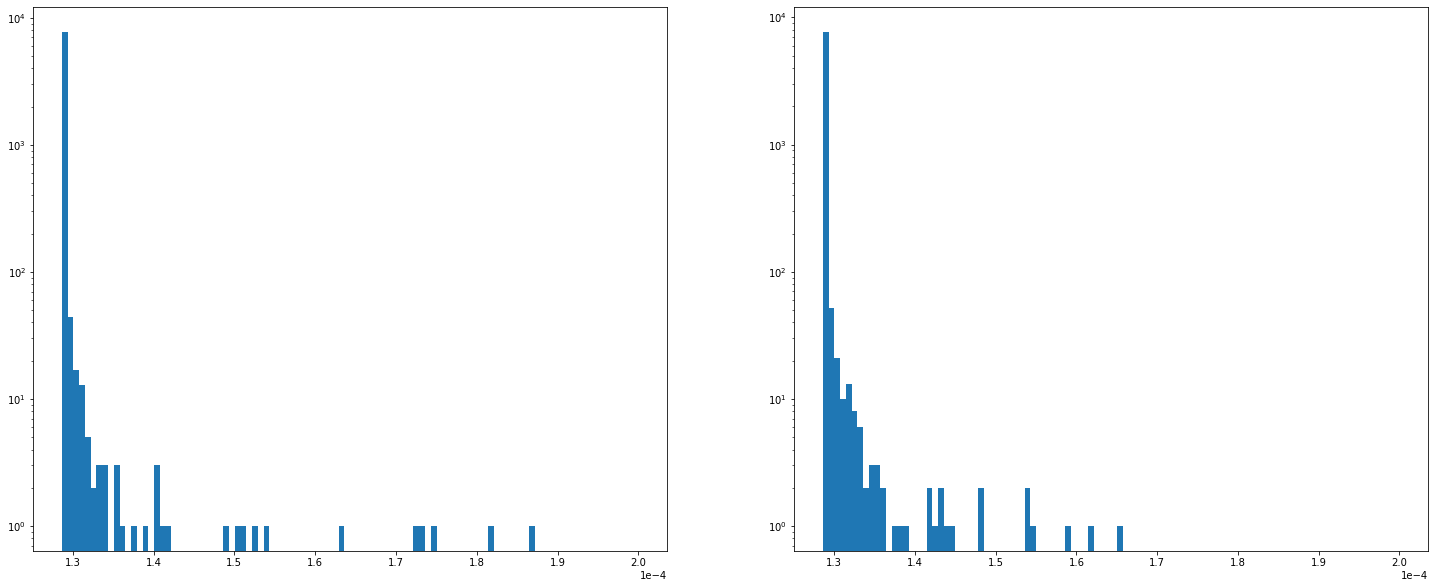

In [65]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(25, 10))

max = 2E-4
_ = axs[0].hist(
    wd_score, bins=100, range=(np.nanmin(wd_score), max)
)

_ = axs[1].hist(
    wd_neg_score, bins=100, range=(np.nanmin(wd_neg_score), max)
)

for ax in axs:
    # ax.set_xscale("log")
    ax.ticklabel_format(axis="x", style="sci", scilimits=(-4, 0))
    ax.set_yscale("log")

Bottleneck distance

In [64]:
q_bd_scores = np.quantile(bd_score, q=quantiles)
q_bd_neg_scores = np.quantile(bd_neg_score, q=quantiles)

for idx, q in enumerate(quantiles):

    print(f"bdist: {int(q*100)}% -> {q_bd_scores[idx]:.4e}")

for idx, q in enumerate(quantiles):

    print(f"bdist (neg flux): {int(q*100)}% -> {q_bd_neg_scores[idx]:.4e}")

bdist: 25% -> 1.2866e-04
bdist: 50% -> 1.2866e-04
bdist: 75% -> 1.2866e-04
bdist: 80% -> 1.2866e-04
bdist: 90% -> 1.2867e-04
bdist: 95% -> 1.2873e-04
bdist: 99% -> 1.2990e-04
bdist (neg flux): 25% -> 1.2868e-04
bdist (neg flux): 50% -> 1.2868e-04
bdist (neg flux): 75% -> 1.2868e-04
bdist (neg flux): 80% -> 1.2868e-04
bdist (neg flux): 90% -> 1.2870e-04
bdist (neg flux): 95% -> 1.2876e-04
bdist (neg flux): 99% -> 1.2989e-04


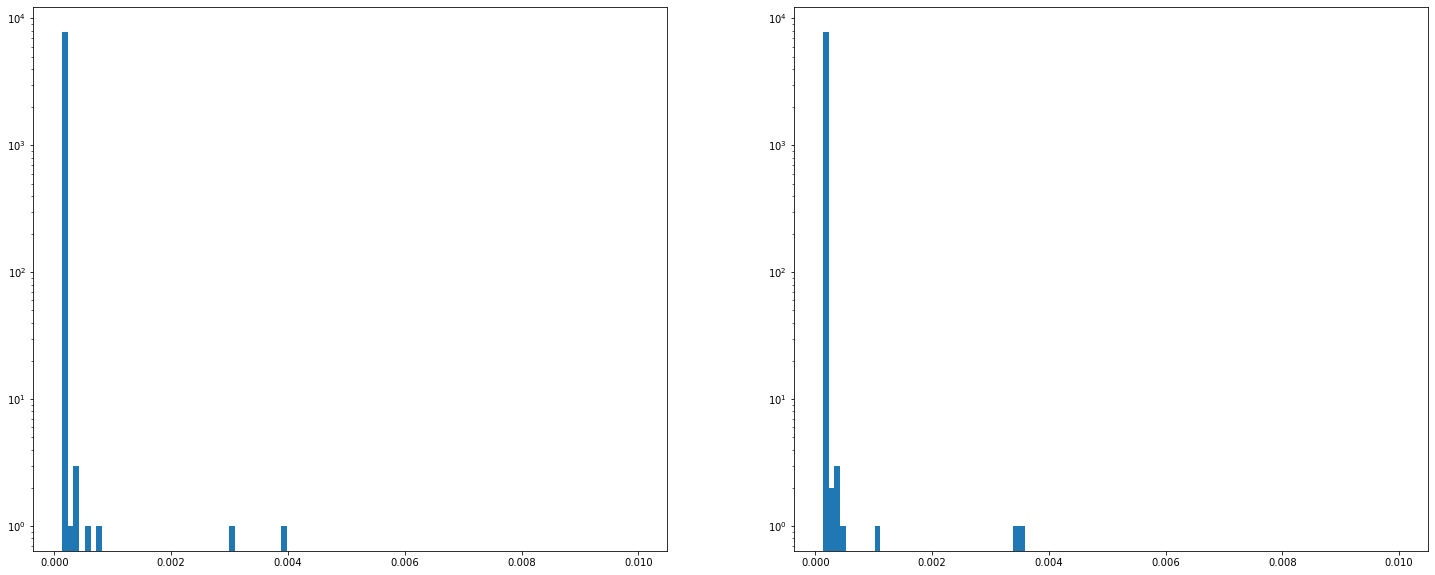

In [72]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(25, 10))

max = 1e-2
_ = axs[0].hist(
    bd_score, bins=100, range=(np.nanmin(bd_score), max)
)

_ = axs[1].hist(
    bd_neg_score, bins=100, range=(np.nanmin(bd_neg_score), max)
)

for ax in axs:
    # ax.set_xscale("log")
    ax.ticklabel_format(axis="x", style="sci", scilimits=(-4, 0))
    ax.set_yscale("log")

# Explore anomalies and compare

In [91]:
lcs = pd.read_csv(
    f"{data_directory}/plasticc_train_lightcurves.csv.gz",
)
meta_data = pd.read_csv(
    f"{data_directory}/plasticc_train_metadata.csv.gz",
)
# load map from idx to objectid
idx_id_bd_neg = np.load(
    f"{data_directory}/objid_bottleneck_"
    f"series_7848_norm_mean_{band}_keep_negative.npy",
    mmap_mode="r",
    
).astype(int)

idx_id_wd_neg = np.load(
    f"{data_directory}/objid_wasserstein_"
    f"series_7848_norm_mean_{band}_keep_negative.npy",
    mmap_mode="r"
).astype(int)

idx_id_bd = np.load(
    f"{data_directory}/objid_bottleneck_series_7848_norm_mean_{band}.npy",
    mmap_mode="r"
).astype(int)

idx_id_wd = np.load(
    f"{data_directory}/objid_bottleneck_series_7848_norm_mean_{band}.npy",
    mmap_mode="r"
).astype(int)

In [90]:
u_band = lcs[lcs['passband']==0]
unique_objid = np.unique(u_band['object_id'])

u_lcs = {}
u_lcs_mjd = {}

for object_id in unique_objid:
    
    id_mask = object_id == u_band['object_id']

    u_lcs[f"{object_id}"] = u_band.loc[id_mask, "flux"].to_numpy()
    u_lcs_mjd[f"{object_id}"] = u_band.loc[id_mask, "mjd"].to_numpy()

In [101]:
wd_idx = np.argsort(wd_score)
wd_neg_idx = np.argsort(wd_neg_score)
bd_idx = np.argsort(wd_score)
bd_neg_idx = np.argsort(wd_neg_score)

-201.51615208333337

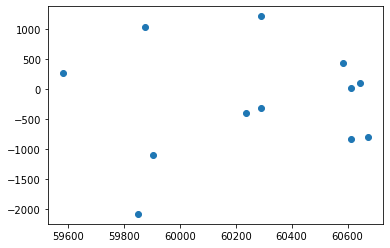

In [113]:
rank = -100
objid = idx_id_wd_neg[wd_neg_idx[rank], 1]

lc = u_lcs[f"{objid}"]
mjd = u_lcs_mjd[f"{objid}"]

plt.scatter(mjd, lc)
np.nanmean(lc)

In [92]:
idx_id_wd[:3]

array([[  0, 615],
       [  1, 713],
       [  2, 730]])